# Load Model From Hugging Face

In [1]:
from transformers import AutoTokenizer, AutoModelForCausalLM

tokenizer = AutoTokenizer.from_pretrained("openai-community/gpt2")
model = AutoModelForCausalLM.from_pretrained("openai-community/gpt2")


/home/tanzeel/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## log model in by default experiment

In [2]:
import mlflow

with mlflow.start_run():
    components = {
        "model": model,
        "tokenizer": tokenizer,
    }
    mlflow.transformers.log_model(
        transformers_model=components,
        artifact_path="gpt_model",
    )

Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 50, 'do_sample': True}


## log model by given custom run name

In [2]:
import mlflow

with mlflow.start_run() as run:
    mlflow.set_tag('mlflow.runName', 'GPT2')
    components = {
        "model": model,
        "tokenizer": tokenizer,
    }
    mlflow.transformers.log_model(
        transformers_model=components,
        artifact_path="gpt_model",
    )

Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 50, 'do_sample': True}


## log model with custom experiment name

In [4]:
model_config = {
    "top_k": 2,
    "num_beams": 5,
    "max_length": 30,
    "temperature": 0.62,
    "top_p": 0.85,
    "repetition_penalty": 1.15,
}

In [5]:
with mlflow.start_run(run_name='my_first_run') as run:
    mlflow.set_experiment("my_first_experiment")
    components = {
        "model": model,
        "tokenizer": tokenizer,
    }
    mlflow.transformers.log_model(
        transformers_model=components,
        artifact_path="gpt2_model",
        task = "text-generation",
        model_config = model_config
    )

Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 50, 'do_sample': True}


In [3]:
run.info.run_id

'a69e10e157ea4bae85b16cd2d8b908fb'

## load model from mlflow

In [5]:
model_uri = f"runs:/{run.info.run_id}/gpt_model"
loaded = mlflow.pyfunc.load_model(model_uri)

In [6]:
model_uri

'runs:/a69e10e157ea4bae85b16cd2d8b908fb/gpt_model'

In [7]:
loaded.predict("what is gpt2")

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


["what is gpt2' in python? That's it.\n\nGreeting:\n\n@chris.quigley @scott.kitty\n\nI like what you do, and I'll try to write your first"]

## Pipeline

In [2]:
from langchain.llms import HuggingFacePipeline
from transformers import pipeline

pipe = pipeline(
                'text-generation',
                model=model,
                tokenizer=tokenizer,
                max_length=1024,
)

gpt2_llm = HuggingFacePipeline(pipeline=pipe)

In [4]:
import mlflow
with mlflow.start_run(run_name='my_first_run') as run:
    mlflow.set_experiment("my_experiment_2")
    mlflow.transformers.log_model(
        transformers_model=pipe,
        artifact_path="gpt2_model_with_PIELINES",
        task = "text-generation",
    )

Traceback (most recent call last):
  File "/home/tanzeel/.local/lib/python3.10/site-packages/mlflow/store/tracking/file_store.py", line 302, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
  File "/home/tanzeel/.local/lib/python3.10/site-packages/mlflow/store/tracking/file_store.py", line 395, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
  File "/home/tanzeel/.local/lib/python3.10/site-packages/mlflow/store/tracking/file_store.py", line 1320, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
  File "/home/tanzeel/.local/lib/python3.10/site-packages/mlflow/store/tracking/file_store.py", line 1313, in _read_helper
    result = read_yaml(root, file_name)
  File "/home/tanzeel/.local/lib/python3.10/site-packages/mlflow/utils/file_utils.py", line 310, in read_yaml
    raise MissingConfigException(f"Yaml file '{file_path}' does not exist.")
mlflow.exceptions.MissingConfigException: Y

## Save model in Local 

In [36]:
with mlflow.start_run():
    components = {
        "model": model,
        "tokenizer": tokenizer,
    }
    mlflow.transformers.save_model(
        transformers_model=components,
        path="home/mlflow/model",
    )

Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 50, 'do_sample': True}


### save_pretrained –

If set to False, MLflow will not save the Transformer model weight files, instead only saving the reference to the HuggingFace Hub model repository and its commit hash. This is useful when you load the pretrained model from HuggingFace Hub and want to log or save it to MLflow without modifying the model weights. In such case, specifying this flag to False will save the storage space and reduce time to save the model. Please refer to the Storage-Efficient Model Logging for more detailed usage.



In [ ]:
import mlflow.transformers

model_uri = "YOUR_MODEL_URI_LOGGED_WITH_SAVE_PRETRAINED_FALSE"
model = mlflow.transformers.persist_pretrained_model(model_uri)
mlflow.register_model(model_uri, "model_name")

In [13]:
!mlflow ui

/home/tanzeel/.local/lib/python3.10/site-packages/pydantic/_internal/_config.py:322: UserWarning: Valid config keys have changed in V2:
* 'schema_extra' has been renamed to 'json_schema_extra'
  warnings.warn(message, UserWarning)
[2024-03-13 10:20:59 +0500] [8403] [INFO] Starting gunicorn 20.1.0
[2024-03-13 10:20:59 +0500] [8403] [INFO] Listening at: http://127.0.0.1:5000 (8403)
[2024-03-13 10:20:59 +0500] [8403] [INFO] Using worker: sync
[2024-03-13 10:20:59 +0500] [8404] [INFO] Booting worker with pid: 8404
[2024-03-13 10:20:59 +0500] [8405] [INFO] Booting worker with pid: 8405
[2024-03-13 10:20:59 +0500] [8421] [INFO] Booting worker with pid: 8421
[2024-03-13 10:20:59 +0500] [8422] [INFO] Booting worker with pid: 8422
^C
[2024-03-13 10:22:49 +0500] [8403] [INFO] Handling signal: int
[2024-03-13 10:22:49 +0500] [8404] [INFO] Worker exiting (pid: 8404)
[2024-03-13 10:22:49 +0500] [8405] [INFO] Worker exiting (pid: 8405)
[2024-03-13 10:22:49 +0500] [8422] [INFO] Worker exiting (pid: 8

In [5]:
# pip install langchain
# pip install transformers
# pip install chromadb
# pip install sentence_transformers
# pip install accelerate
# pip install bitsandbytes
# pip install rank_bm25 > /dev/null
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.document_loaders import TextLoader
from langchain.embeddings import HuggingFaceBgeEmbeddings
from transformers import pipeline
from langchain.llms import HuggingFacePipeline
from langchain.vectorstores.chroma import Chroma
from langchain.document_loaders import DirectoryLoader
import pandas as pd
import mlflow
import mlflow.deployments
from mlflow.deployments import set_deployments_target
from mlflow.metrics.genai.metric_definitions import relevance, faithfulness


/home/tanzeel/.local/lib/python3.10/site-packages/pydantic/_internal/_config.py:322: UserWarning: Valid config keys have changed in V2:
* 'schema_extra' has been renamed to 'json_schema_extra'
  warnings.warn(message, UserWarning)


In [2]:
def loadSplitDocuments(file_path, chunk_size, chunk_overlap):
  loader = DirectoryLoader(file_path, glob = "*.txt", loader_cls=TextLoader)
  documents = loader.load()
  text_splitter = RecursiveCharacterTextSplitter(chunk_size = chunk_size, chunk_overlap= chunk_overlap)
  text  = text_splitter.split_documents(documents)
  return text


text = loadSplitDocuments("Pdf_Parsers_Txt_Files", chunk_size = 600, chunk_overlap=60)

In [6]:

model_name = "BAAI/bge-small-en"
model_kwargs = {"device": "cuda"}
encode_kwargs = {"normalize_embeddings": True}

bgeEmbeddings = HuggingFaceBgeEmbeddings(
                                     model_name=model_name,
                                     model_kwargs=model_kwargs,
                                     encode_kwargs=encode_kwargs)

In [4]:
directory = 'db'

vectordb = Chroma.from_documents(
                    documents = text,
                    embedding = bgeEmbeddings,
                    persist_directory= directory )

vectordb.persist()

# Retriever Evaluation

####  It helps to evaluate the retriever in a RAG application. It contains three built-in metrics precision_at_k, recall_at_k and ndcg_at_k.

In [7]:
directory = 'db'
vectordb = Chroma(persist_directory = directory, embedding_function= bgeEmbeddings)

retriever = vectordb.as_retriever(search_type = "similarity")

docs = retriever.get_relevant_documents("When will the lab heating was started early morning at approximately?")
docs

[Document(page_content='The lab heating was started early morning at approximately 7 pm. Initially all\nheaters  were  placed  at their designated  positions  in the lab. However,  after some\nhours at around 10pm heaters were moved such that the atmosphere around the\nactual system is targeted. Two heaters were placed at  some distance from the\nbattery enclosure before closing it to raise the temperature of the immediate\nsurroundings of the cell modules. Then all loggers were inspected before closing\nthe enclosure. Once the enclosure was closed then lab was sealed and door', metadata={'source': 'Pdf_Parsers_Txt_Files/Thermal Test Report_parsed.txt'}),
 Document(page_content='Test was started at approximately 12:45 pm. At this point the ambient temperature\naround the system was approxima tely 42 ℃and the cells were at 40 ℃. First,\ncharging was started at 0.5C and it was stopped when SoC reached 75%. Then\nimmediately, discharging was started at 2:10 pm at 1C which was stopped at 2

In [24]:
eval_df = pd.DataFrame(
    {
    "questions": [
    "When will the lab heating was started early morning at approximately?",
    "Explore the interactions between the NGM app, BMS Manager, and Inverter Manager in ensuring efficient communication and data exchange across various system components, highlighting their roles in initialization and operational control.",
    "How do the Cloud Manager, WiFi Wizard, and Database Manager collaborate to maintain seamless connectivity and data synchronization between the local system and the cloud, considering their respective responsibilities and interactions?",
    # "Discuss the collaborative efforts of the Bring Up Service, UI Manager, and Alerts Service in providing comprehensive system feedback to operators, considering their roles in initialization, user interface management, and alert generation.",
    # "Explain how the Forecast Engine and Smart Flow Manager work together to optimize system performance based on forecasted data, emphasizing their roles in data processing and decision-making for backup and charge source strategies.",
    # "Explore the interconnectedness of various components such as the NGM app, BMS Manager, and Inverter Manager in handling both routine operations and contingency scenarios, highlighting the importance of seamless coordination for overall system reliability.",
    # "How do the NGM app, Cloud Manager, and Alerts Service contribute to system resilience in the face of network failures or hardware disconnectivity, considering their roles in system initialization, data transfer, and alert generation?",
    # "Discuss the integration between the Database Manager and other components such as the Bring Up Service and UI Manager in maintaining consistent data access and user interface feedback, considering their roles in data management and system monitoring.",
    # "Explain the collaborative efforts between the Inverter Manager, BMS Manager, and Smart Flow Manager in optimizing power flow and operational strategies based on real-time data and forecasted trends, emphasizing their roles in system stability and efficiency.",
    # "How do the NGM app, WiFi Wizard, and Cloud Manager adapt to changing network conditions and ensure continuous system operation and data synchronization, considering their roles in network connectivity and cloud integration?",
    # "Explore the overall system architecture and interactions among components such as the NGM app, Inverter Manager, and Alerts Service in ensuring reliable operation and timely response to various system events, highlighting the integration and coordination required for seamless functionality.",
        ],
    }
)

display(eval_df)

,questions
0,When will the lab heating was started early mo...
1,"Explore the interactions between the NGM app, ..."
2,"How do the Cloud Manager, WiFi Wizard, and Dat..."


In [11]:
eval_df = pd.DataFrame(
    {
    "questions": [
    "When will the lab heating was started early morning at approximately?",
    "Explore the interactions between the NGM app, BMS Manager, and Inverter Manager in ensuring efficient communication and data exchange across various system components, highlighting their roles in initialization and operational control.",
    "How do the Cloud Manager, WiFi Wizard, and Database Manager collaborate to maintain seamless connectivity and data synchronization between the local system and the cloud, considering their respective responsibilities and interactions?",
        ],
    }
)

eval_df.to_csv("generator_evaluation.csv")

#### We define a function that takes a question string as input and returns a list of relevant doc ID strings.

In [9]:
def retrieve_doc_ids(question: str):
        docs = retriever.get_relevant_documents(question)
        return [doc.metadata["source"] for doc in docs]
    
    
def retriever_model_function(question_df: pd.DataFrame) -> pd.Series:
        return question_df["question"].apply(retrieve_doc_ids)

In [10]:
eval_df["retrieved_doc_ids"] = eval_df["questions"].apply(retrieve_doc_ids)
eval_df.head(3)

,questions,retrieved_doc_ids
0,When will the lab heating was started early mo...,[Pdf_Parsers_Txt_Files/Thermal Test Report_par...
1,"Explore the interactions between the NGM app, ...",[Pdf_Parsers_Txt_Files/Basic Structure of the ...
2,"How do the Cloud Manager, WiFi Wizard, and Dat...",[Pdf_Parsers_Txt_Files/Basic Structure of the ...


In [16]:
import pandas as pd
import mlflow
import mlflow.deployments
from mlflow.deployments import set_deployments_target
from mlflow.metrics.genai.metric_definitions import relevance


eval_data = pd.DataFrame(
    {
        "question": [
            "When will the lab heating was started early morning at approximately?",
            "Explore the interactions between the NGM app, BMS Manager, and Inverter Manager in ensuring efficient communication and data exchange across various system components, highlighting their roles in initialization and operational control.",
            "How do the Cloud Manager, WiFi Wizard, and Database Manager collaborate to maintain seamless connectivity and data synchronization between the local system and the cloud, considering their respective responsibilities and interactions?",
            "Discuss the collaborative efforts of the Bring Up Service, UI Manager, and Alerts Service in providing comprehensive system feedback to operators, considering their roles in initialization, user interface management, and alert generation.",
            "Explain how the Forecast Engine and Smart Flow Manager work together to optimize system performance based on forecasted data, emphasizing their roles in data processing and decision-making for backup and charge source strategies.",
            "Explore the interconnectedness of various components such as the NGM app, BMS Manager, and Inverter Manager in handling both routine operations and contingency scenarios, highlighting the importance of seamless coordination for overall system reliability.",
            "How do the NGM app, Cloud Manager, and Alerts Service contribute to system resilience in the face of network failures or hardware disconnectivity, considering their roles in system initialization, data transfer, and alert generation?",
            "Discuss the integration between the Database Manager and other components such as the Bring Up Service and UI Manager in maintaining consistent data access and user interface feedback, considering their roles in data management and system monitoring.",
            "Explain the collaborative efforts between the Inverter Manager, BMS Manager, and Smart Flow Manager in optimizing power flow and operational strategies based on real-time data and forecasted trends, emphasizing their roles in system stability and efficiency.",
            "How do the NGM app, WiFi Wizard, and Cloud Manager adapt to changing network conditions and ensure continuous system operation and data synchronization, considering their roles in network connectivity and cloud integration?",
            "Explore the overall system architecture and interactions among components such as the NGM app, Inverter Manager, and Alerts Service in ensuring reliable operation and timely response to various system events, highlighting the integration and coordination required for seamless functionality.",
        ],
        "source": [
            ["Pdf_Parsers_Txt_Files/Thermal Test Report_parsed.txt"],
            ["Pdf_Parsers_Txt_Files/Basic Structure of the Local High Voltage Product _parsed.txt"],
            ["Pdf_Parsers_Txt_Files/Basic Structure of the Local High Voltage Product _parsed.txt"],
            ["Pdf_Parsers_Txt_Files/Basic Structure of the Local High Voltage Product _parsed.txt"],
            ["Pdf_Parsers_Txt_Files/Basic Structure of the Local High Voltage Product _parsed.txt"],
            ["Pdf_Parsers_Txt_Files/Basic Structure of the Local High Voltage Product _parsed.txt"],
            ["Pdf_Parsers_Txt_Files/Basic Structure of the Local High Voltage Product _parsed.txt"],
            ["Pdf_Parsers_Txt_Files/Basic Structure of the Local High Voltage Product _parsed.txt"],
            ["Pdf_Parsers_Txt_Files/Basic Structure of the Local High Voltage Product _parsed.txt"],
            ['Pdf_Parsers_Txt_Files/Basic Structure of the Local High Voltage Product _parsed.txt'],
            ['Pdf_Parsers_Txt_Files/Basic Structure of the Local High Voltage Product _parsed.txt'],
        ],
    }
)
eval_data

,question,source
0,When will the lab heating was started early mo...,[Pdf_Parsers_Txt_Files/Thermal Test Report_par...
1,"Explore the interactions between the NGM app, ...",[Pdf_Parsers_Txt_Files/Basic Structure of the ...
2,"How do the Cloud Manager, WiFi Wizard, and Dat...",[Pdf_Parsers_Txt_Files/Basic Structure of the ...
3,Discuss the collaborative efforts of the Bring...,[Pdf_Parsers_Txt_Files/Basic Structure of the ...
4,Explain how the Forecast Engine and Smart Flow...,[Pdf_Parsers_Txt_Files/Basic Structure of the ...
5,Explore the interconnectedness of various comp...,[Pdf_Parsers_Txt_Files/Basic Structure of the ...
6,"How do the NGM app, Cloud Manager, and Alerts ...",[Pdf_Parsers_Txt_Files/Basic Structure of the ...
7,Discuss the integration between the Database M...,[Pdf_Parsers_Txt_Files/Basic Structure of the ...
8,Explain the collaborative efforts between the ...,[Pdf_Parsers_Txt_Files/Basic Structure of the ...
9,"How do the NGM app, WiFi Wizard, and Cloud Man...",[Pdf_Parsers_Txt_Files/Basic Structure of the ...


In [3]:
eval_data.to_csv("evaluation_data.csv")

In [13]:
with mlflow.start_run(run_name="retriever part evaulation") as run:
    mlflow.set_experiment("SE_LLM_Evaluation")
    results = mlflow.evaluate(
        model=retriever_model_function,
        data=eval_data,
        model_type="retriever",
        targets="source",
        evaluators="default",
    )
    print(results.metrics)

display(results.tables["eval_results_table"])

Traceback (most recent call last):
  File "/home/tanzeel/.local/lib/python3.10/site-packages/mlflow/store/tracking/file_store.py", line 302, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
  File "/home/tanzeel/.local/lib/python3.10/site-packages/mlflow/store/tracking/file_store.py", line 395, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
  File "/home/tanzeel/.local/lib/python3.10/site-packages/mlflow/store/tracking/file_store.py", line 1320, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
  File "/home/tanzeel/.local/lib/python3.10/site-packages/mlflow/store/tracking/file_store.py", line 1313, in _read_helper
    result = read_yaml(root, file_name)
  File "/home/tanzeel/.local/lib/python3.10/site-packages/mlflow/utils/file_utils.py", line 310, in read_yaml
    raise MissingConfigException(f"Yaml file '{file_path}' does not exist.")
mlflow.exceptions.MissingConfigException: Y

{'precision_at_3/mean': 0.7575757575757575, 'precision_at_3/variance': 0.08264462809917356, 'precision_at_3/p90': 1.0, 'recall_at_3/mean': 1.0, 'recall_at_3/variance': 0.0, 'recall_at_3/p90': 1.0, 'ndcg_at_3/mean': 1.0, 'ndcg_at_3/variance': 0.0, 'ndcg_at_3/p90': 1.0}


,question,source,outputs,precision_at_3/score,recall_at_3/score,ndcg_at_3/score
0,When will the lab heating was started early mo...,[Pdf_Parsers_Txt_Files/Thermal Test Report_par...,[Pdf_Parsers_Txt_Files/Thermal Test Report_par...,1.000000,1,1
1,"Explore the interactions between the NGM app, ...",[Pdf_Parsers_Txt_Files/Basic Structure of the ...,[Pdf_Parsers_Txt_Files/Basic Structure of the ...,1.000000,1,1
2,"How do the Cloud Manager, WiFi Wizard, and Dat...",[Pdf_Parsers_Txt_Files/Basic Structure of the ...,[Pdf_Parsers_Txt_Files/Basic Structure of the ...,0.666667,1,1
3,Discuss the collaborative efforts of the Bring...,[Pdf_Parsers_Txt_Files/Basic Structure of the ...,[Pdf_Parsers_Txt_Files/Basic Structure of the ...,0.333333,1,1
4,Explain how the Forecast Engine and Smart Flow...,[Pdf_Parsers_Txt_Files/Basic Structure of the ...,[Pdf_Parsers_Txt_Files/Basic Structure of the ...,0.333333,1,1
5,Explore the interconnectedness of various comp...,[Pdf_Parsers_Txt_Files/Basic Structure of the ...,[Pdf_Parsers_Txt_Files/Basic Structure of the ...,1.000000,1,1
6,"How do the NGM app, Cloud Manager, and Alerts ...",[Pdf_Parsers_Txt_Files/Basic Structure of the ...,[Pdf_Parsers_Txt_Files/Basic Structure of the ...,1.000000,1,1
7,Discuss the integration between the Database M...,[Pdf_Parsers_Txt_Files/Basic Structure of the ...,[Pdf_Parsers_Txt_Files/Basic Structure of the ...,0.333333,1,1
8,Explain the collaborative efforts between the ...,[Pdf_Parsers_Txt_Files/Basic Structure of the ...,[Pdf_Parsers_Txt_Files/Basic Structure of the ...,1.000000,1,1
9,"How do the NGM app, WiFi Wizard, and Cloud Man...",[Pdf_Parsers_Txt_Files/Basic Structure of the ...,[Pdf_Parsers_Txt_Files/Basic Structure of the ...,1.000000,1,1


In [17]:
results.tables["eval_results_table"]["outputs"][0]

['Pdf_Parsers_Txt_Files/Thermal Test Report_parsed.txt',
 'Pdf_Parsers_Txt_Files/Thermal Test Report_parsed.txt',
 'Pdf_Parsers_Txt_Files/Thermal Test Report_parsed.txt',
 'Pdf_Parsers_Txt_Files/ProductManual_ HVGoodWe_parsed.txt']

In [18]:
with mlflow.start_run(run_name="retriever part evaulation with different values") as run:
    evaluate_results = mlflow.evaluate(
        model=retriever_model_function,
        data=eval_data,
        targets="source",
        evaluators="default",
        extra_metrics=[
            mlflow.metrics.precision_at_k(1),
            mlflow.metrics.precision_at_k(2),
            mlflow.metrics.precision_at_k(3),
            mlflow.metrics.recall_at_k(1),
            mlflow.metrics.recall_at_k(2),
            mlflow.metrics.recall_at_k(3),
            mlflow.metrics.ndcg_at_k(1),
            mlflow.metrics.ndcg_at_k(2),
            mlflow.metrics.ndcg_at_k(3),
        ],
    )

display(evaluate_results.tables["eval_results_table"])

/home/tanzeel/.local/lib/python3.10/site-packages/mlflow/data/digest_utils.py:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  string_columns = trimmed_df.columns[(df.applymap(type) == str).all(0)]
/home/tanzeel/.local/lib/python3.10/site-packages/mlflow/models/evaluation/base.py:521: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(_hash_array_like_element_as_bytes)
/home/tanzeel/.local/lib/python3.10/site-packages/mlflow/models/evaluation/base.py:521: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(_hash_array_like_element_as_bytes)
2024/03/14 09:53:30 INFO mlflow.models.evaluation.base: Evaluating the model with the default evaluator.
2024/03/14 09:53:30 INFO mlflow.models.evaluation.default_evaluator: Computing model predictions.


2024/03/14 09:53:30 INFO mlflow.models.evaluation.default_evaluator: Testing metrics on first row...


,question,source,outputs,precision_at_1/score,precision_at_2/score,precision_at_3/score,recall_at_1/score,recall_at_2/score,recall_at_3/score,ndcg_at_1/score,ndcg_at_2/score,ndcg_at_3/score
0,When will the lab heating was started early mo...,[Pdf_Parsers_Txt_Files/Thermal Test Report_par...,[Pdf_Parsers_Txt_Files/Thermal Test Report_par...,1,1.0,1.000000,1,1,1,1,1,1
1,"Explore the interactions between the NGM app, ...",[Pdf_Parsers_Txt_Files/Basic Structure of the ...,[Pdf_Parsers_Txt_Files/Basic Structure of the ...,1,1.0,1.000000,1,1,1,1,1,1
2,"How do the Cloud Manager, WiFi Wizard, and Dat...",[Pdf_Parsers_Txt_Files/Basic Structure of the ...,[Pdf_Parsers_Txt_Files/Basic Structure of the ...,1,0.5,0.333333,1,1,1,1,1,1
3,Discuss the collaborative efforts of the Bring...,[Pdf_Parsers_Txt_Files/Basic Structure of the ...,[Pdf_Parsers_Txt_Files/Basic Structure of the ...,1,0.5,0.333333,1,1,1,1,1,1
4,Explain how the Forecast Engine and Smart Flow...,[Pdf_Parsers_Txt_Files/Basic Structure of the ...,[Pdf_Parsers_Txt_Files/Basic Structure of the ...,1,0.5,0.333333,1,1,1,1,1,1
5,Explore the interconnectedness of various comp...,[Pdf_Parsers_Txt_Files/Basic Structure of the ...,[Pdf_Parsers_Txt_Files/Basic Structure of the ...,1,1.0,1.000000,1,1,1,1,1,1
6,"How do the NGM app, Cloud Manager, and Alerts ...",[Pdf_Parsers_Txt_Files/Basic Structure of the ...,[Pdf_Parsers_Txt_Files/Basic Structure of the ...,1,1.0,1.000000,1,1,1,1,1,1
7,Discuss the integration between the Database M...,[Pdf_Parsers_Txt_Files/Basic Structure of the ...,[Pdf_Parsers_Txt_Files/Basic Structure of the ...,1,0.5,0.333333,1,1,1,1,1,1
8,Explain the collaborative efforts between the ...,[Pdf_Parsers_Txt_Files/Basic Structure of the ...,[Pdf_Parsers_Txt_Files/Basic Structure of the ...,1,1.0,1.000000,1,1,1,1,1,1
9,"How do the NGM app, WiFi Wizard, and Cloud Man...",[Pdf_Parsers_Txt_Files/Basic Structure of the ...,[Pdf_Parsers_Txt_Files/Basic Structure of the ...,1,1.0,1.000000,1,1,1,1,1,1


In [19]:
import pprint

pp = pprint.PrettyPrinter(indent=4)
pp.pprint(evaluate_results.metrics)

{   'ndcg_at_1/mean': 1.0,
    'ndcg_at_1/p90': 1.0,
    'ndcg_at_1/variance': 0.0,
    'ndcg_at_2/mean': 1.0,
    'ndcg_at_2/p90': 1.0,
    'ndcg_at_2/variance': 0.0,
    'ndcg_at_3/mean': 1.0,
    'ndcg_at_3/p90': 1.0,
    'ndcg_at_3/variance': 0.0,
    'precision_at_1/mean': 1.0,
    'precision_at_1/p90': 1.0,
    'precision_at_1/variance': 0.0,
    'precision_at_2/mean': 0.8181818181818182,
    'precision_at_2/p90': 1.0,
    'precision_at_2/variance': 0.057851239669421496,
    'precision_at_3/mean': 0.7272727272727273,
    'precision_at_3/p90': 1.0,
    'precision_at_3/variance': 0.09733700642791553,
    'recall_at_1/mean': 1.0,
    'recall_at_1/p90': 1.0,
    'recall_at_1/variance': 0.0,
    'recall_at_2/mean': 1.0,
    'recall_at_2/p90': 1.0,
    'recall_at_2/variance': 0.0,
    'recall_at_3/mean': 1.0,
    'recall_at_3/p90': 1.0,
    'recall_at_3/variance': 0.0}


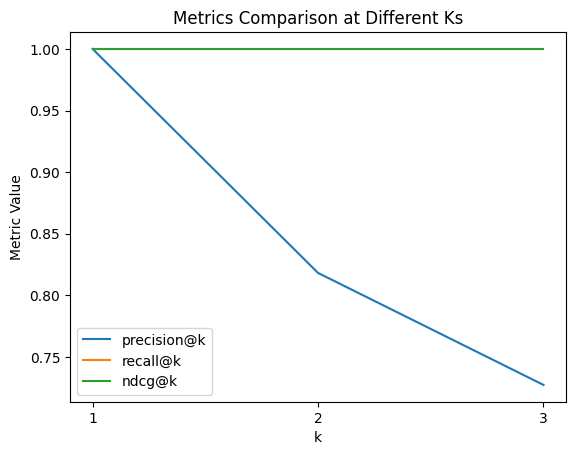

In [63]:
import matplotlib.pyplot as plt
import mlflow

# Plotting each metric
for metric_name in ["precision", "recall", "ndcg"]:
    y = [evaluate_results.metrics[f"{metric_name}_at_{k}/mean"] for k in range(1, 4)]
    plt.plot([1, 2, 3], y, label=f"{metric_name}@k")

# Adding labels and title
plt.xlabel("k")
plt.ylabel("Metric Value")
plt.title("Metrics Comparison at Different Ks")
# Setting x-axis ticks
plt.xticks([1, 2, 3])
plt.legend()

# Save the plot as an image file
plot_path = "mlruns/artifacts/metrics_plot.png"
plt.savefig(plot_path)

# Log the plot as an artifact in MLflow
with mlflow.start_run(run_name="metrics plot") as run:
    mlflow.log_artifact(plot_path, artifact_path="mlruns/artifacts/metrics_plot.png")


### Try different k values
#### To use another k value, use the evaluator_config parameter in the mlflow.evaluate() API as follows: evaluator_config={"retriever_k": <k_value>}.

In [21]:

with mlflow.start_run(run_name=" differentr etriever K value") as run:
    results = mlflow.evaluate(
        model=retriever_model_function,
        data=eval_data,
        model_type="retriever",
        targets="source",
        evaluators="default",
        evaluator_config={"retriever_k": 6}
    )
    print(results.metrics)

display(results.tables["eval_results_table"])

/home/tanzeel/.local/lib/python3.10/site-packages/mlflow/data/digest_utils.py:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  string_columns = trimmed_df.columns[(df.applymap(type) == str).all(0)]
/home/tanzeel/.local/lib/python3.10/site-packages/mlflow/models/evaluation/base.py:521: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(_hash_array_like_element_as_bytes)
/home/tanzeel/.local/lib/python3.10/site-packages/mlflow/models/evaluation/base.py:521: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(_hash_array_like_element_as_bytes)
2024/03/14 09:53:49 INFO mlflow.models.evaluation.base: Evaluating the model with the default evaluator.
2024/03/14 09:53:49 INFO mlflow.models.evaluation.default_evaluator: Computing model predictions.


2024/03/14 09:53:49 INFO mlflow.models.evaluation.default_evaluator: Testing metrics on first row...


{'precision_at_6/mean': 0.6590909090909091, 'precision_at_6/variance': 0.08264462809917356, 'precision_at_6/p90': 1.0, 'recall_at_6/mean': 1.0, 'recall_at_6/variance': 0.0, 'recall_at_6/p90': 1.0, 'ndcg_at_6/mean': 0.9747180558332063, 'ndcg_at_6/variance': 0.0021981405421771473, 'ndcg_at_6/p90': 1.0}


,question,source,outputs,precision_at_6/score,recall_at_6/score,ndcg_at_6/score
0,When will the lab heating was started early mo...,[Pdf_Parsers_Txt_Files/Thermal Test Report_par...,[Pdf_Parsers_Txt_Files/Thermal Test Report_par...,0.75,1,1.000000
1,"Explore the interactions between the NGM app, ...",[Pdf_Parsers_Txt_Files/Basic Structure of the ...,[Pdf_Parsers_Txt_Files/Basic Structure of the ...,0.75,1,1.000000
2,"How do the Cloud Manager, WiFi Wizard, and Dat...",[Pdf_Parsers_Txt_Files/Basic Structure of the ...,[Pdf_Parsers_Txt_Files/Basic Structure of the ...,0.25,1,1.000000
3,Discuss the collaborative efforts of the Bring...,[Pdf_Parsers_Txt_Files/Basic Structure of the ...,[Pdf_Parsers_Txt_Files/Basic Structure of the ...,0.50,1,0.877215
4,Explain how the Forecast Engine and Smart Flow...,[Pdf_Parsers_Txt_Files/Basic Structure of the ...,[Pdf_Parsers_Txt_Files/Basic Structure of the ...,0.25,1,1.000000
5,Explore the interconnectedness of various comp...,[Pdf_Parsers_Txt_Files/Basic Structure of the ...,[Pdf_Parsers_Txt_Files/Basic Structure of the ...,1.00,1,1.000000
6,"How do the NGM app, Cloud Manager, and Alerts ...",[Pdf_Parsers_Txt_Files/Basic Structure of the ...,[Pdf_Parsers_Txt_Files/Basic Structure of the ...,1.00,1,1.000000
7,Discuss the integration between the Database M...,[Pdf_Parsers_Txt_Files/Basic Structure of the ...,[Pdf_Parsers_Txt_Files/Basic Structure of the ...,0.25,1,0.877215
8,Explain the collaborative efforts between the ...,[Pdf_Parsers_Txt_Files/Basic Structure of the ...,[Pdf_Parsers_Txt_Files/Basic Structure of the ...,1.00,1,1.000000
9,"How do the NGM app, WiFi Wizard, and Cloud Man...",[Pdf_Parsers_Txt_Files/Basic Structure of the ...,[Pdf_Parsers_Txt_Files/Basic Structure of the ...,0.75,1,1.000000


In [22]:
evaluate_results.metrics

{'precision_at_1/mean': 1.0,
 'precision_at_1/variance': 0.0,
 'precision_at_1/p90': 1.0,
 'precision_at_2/mean': 0.8181818181818182,
 'precision_at_2/variance': 0.057851239669421496,
 'precision_at_2/p90': 1.0,
 'precision_at_3/mean': 0.7272727272727273,
 'precision_at_3/variance': 0.09733700642791553,
 'precision_at_3/p90': 1.0,
 'recall_at_1/mean': 1.0,
 'recall_at_1/variance': 0.0,
 'recall_at_1/p90': 1.0,
 'recall_at_2/mean': 1.0,
 'recall_at_2/variance': 0.0,
 'recall_at_2/p90': 1.0,
 'recall_at_3/mean': 1.0,
 'recall_at_3/variance': 0.0,
 'recall_at_3/p90': 1.0,
 'ndcg_at_1/mean': 1.0,
 'ndcg_at_1/variance': 0.0,
 'ndcg_at_1/p90': 1.0,
 'ndcg_at_2/mean': 1.0,
 'ndcg_at_2/variance': 0.0,
 'ndcg_at_2/p90': 1.0,
 'ndcg_at_3/mean': 1.0,
 'ndcg_at_3/variance': 0.0,
 'ndcg_at_3/p90': 1.0}

# Evaluation Using LLM

In [14]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForCausalLM

tokenizer = AutoTokenizer.from_pretrained("microsoft/phi-1_5", trust_remote_code=True)
model = AutoModelForCausalLM.from_pretrained("microsoft/phi-1_5", trust_remote_code=True)

In [15]:
from transformers import pipeline
from langchain.llms import HuggingFacePipeline

pipe = pipeline(
    model=model,
    tokenizer=tokenizer,
    task="text-generation",
    max_length=1024,
)

phi_llm = HuggingFacePipeline(pipeline=pipe)

In [17]:
with mlflow.start_run(run_name='Phi-1.5 model') as run:
    mlflow.set_experiment("SE_LLM_Evaluation")
    components = {
        "tokenizer": tokenizer,
        "model": model,
    }
    mlflow.transformers.log_model(
        transformers_model=components,
        artifact_path="Phi-1.5 Model",
    )

Traceback (most recent call last):
  File "/home/tanzeel/.local/lib/python3.10/site-packages/mlflow/store/tracking/file_store.py", line 302, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
  File "/home/tanzeel/.local/lib/python3.10/site-packages/mlflow/store/tracking/file_store.py", line 395, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
  File "/home/tanzeel/.local/lib/python3.10/site-packages/mlflow/store/tracking/file_store.py", line 1320, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
  File "/home/tanzeel/.local/lib/python3.10/site-packages/mlflow/store/tracking/file_store.py", line 1313, in _read_helper
    result = read_yaml(root, file_name)
  File "/home/tanzeel/.local/lib/python3.10/site-packages/mlflow/utils/file_utils.py", line 310, in read_yaml
    raise MissingConfigException(f"Yaml file '{file_path}' does not exist.")
mlflow.exceptions.MissingConfigException: Y

In [18]:
model_end_point = f"runs:/{run.info.run_id}/Phi-1.5 Model"
phi_model = mlflow.pyfunc.load_model(model_end_point)

Loading checkpoint shards: 100%|██████████| 12/12 [00:02<00:00,  5.12it/s]
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [19]:
phi_model.predict("hello")

/home/tanzeel/.local/lib/python3.10/site-packages/transformers/generation/utils.py:1133: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


['hello", "world"]\n    """\n    def is_palindrome(s: str']

## Relevance Metric:
* What It Measures: The relevance_metric quantifies how relevant the RAG system’s answers are to the input questions. This metric is critical for understanding the accuracy and contextual appropriateness of the system’s responses.

* Why It’s Important: In question-answering systems, relevance is paramount. The ability of a RAG system to provide accurate and contextually correct answers determines its utility and effectiveness in real-world applications, such as information retrieval and customer support.

* We utilize the relevance_metric to evaluate the quality of answers provided by the RAG system. It serves as a quantitative measure of the system’s content accuracy, reflecting its capability to generate useful and precise responses.



In [30]:
relevance_metric = relevance(
    model=model_end_point
) 
print(relevance_metric) 

EvaluationMetric(name=relevance, greater_is_better=True, long_name=relevance, version=v1, metric_details=
Task:
You must return the following fields in your response in two lines, one below the other:
score: Your numerical score for the model's relevance based on the rubric
justification: Your reasoning about the model's relevance score

You are an impartial judge. You will be given an input that was sent to a machine
learning model, and you will be given an output that the model produced. You
may also be given additional information that was used by the model to generate the output.

Your task is to determine a numerical score called relevance based on the input and output.
A definition of relevance and a grading rubric are provided below.
You must use the grading rubric to determine your score. You must also justify your score.

Examples could be included below for reference. Make sure to use them as references and to
understand them before completing the task.

Input:
{input}

Outpu

In [21]:
from langchain.chains import RetrievalQA

qa = RetrievalQA.from_chain_type(
    llm=gpt2_llm,
    chain_type="stuff",
    retriever=vectordb.as_retriever(fetch_k=4),
    return_source_documents=True,
)


In [22]:
def model(input_df):
    return input_df["questions"].map(qa).tolist()

## Latency:
* What It Measures: The latency metric captures the response time of the RAG system. It measures the duration taken by the system to generate an answer after receiving a query.

* Why It’s Important: Response time is a critical factor in user experience. In interactive systems, lower latency leads to a more efficient and satisfying user experience. High latency, conversely, can be detrimental to user satisfaction.

* This evaluation is vital for understanding the system’s performance in a production environment, where timely responses are as important as their accuracy.

In [23]:
with mlflow.start_run():
    results = mlflow.evaluate(
        model,
        eval_df,
        model_type="question-answering",
        evaluators="default",
        predictions="result",
        extra_metrics=[relevance_metric, mlflow.metrics.latency()],
        evaluator_config={
            "col_mapping": {
                "inputs": "questions",
                "context": "source_documents",
            }
        },
    )
    print(results.metrics)

display(results.tables["eval_results_table"])

/home/tanzeel/.local/lib/python3.10/site-packages/mlflow/data/digest_utils.py:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  string_columns = trimmed_df.columns[(df.applymap(type) == str).all(0)]
/home/tanzeel/.local/lib/python3.10/site-packages/mlflow/models/evaluation/base.py:521: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(_hash_array_like_element_as_bytes)
2024/03/14 16:16:57 INFO mlflow.models.evaluation.base: Evaluating the model with the default evaluator.
2024/03/14 16:16:57 INFO mlflow.models.evaluation.default_evaluator: Computing model predictions.


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
2024/03/14 16:17:20 INFO mlflow.models.evaluation.default_evaluator: Testing metrics on first row...
2024/03/14 16:21:44 WARNING mlflow.metrics.metric_definitions: Failed to load flesch kincaid metric, skipping metric logging.
2024/03/14 16:21:44 WARNING mlflow.models.evaluation.default_evaluator: Did not log builtin metric 'flesch_kincaid_grade_level' because it returned None.
2024/03/14 16:21:44 WARNING mlflow.metrics.metric_definitions: Failed to load automated readability index metric, skipping metric logging.
2024/03/14 16:21:44 WARNING mlflow.models.evaluation.default_evaluator: Did not log builtin metric 'ari_grade_level' because it returned None.
2024/03/14 16:21:44 WARNING mlflow.models.evaluation.default_evaluator: Did not log builtin metric 'exact_match' because 

{'latency/mean': 7.5067958037058515, 'latency/variance': 24.82195903242444, 'latency/p90': 11.271556663513184, 'toxicity/v1/mean': 0.00693867039323474, 'toxicity/v1/variance': 4.829216366625462e-05, 'toxicity/v1/p90': 0.013998276367783547, 'toxicity/v1/ratio': 0.0, 'relevance/v1/mean': nan, 'relevance/v1/variance': nan}


,questions,retrieved_doc_ids,outputs,source_documents,latency,token_count,toxicity/v1/score,relevance/v1/score,relevance/v1/justification
0,When will the lab heating was started early mo...,[Pdf_Parsers_Txt_Files/Thermal Test Report_par...,10 am on the\nMonday. The heating and was ...,"[{'lc_attributes': {}, 'lc_secrets': {}, 'meta...",11.438267,321,0.016649,NaN,Failed to score model on payload. Error:
1,"Explore the interactions between the NGM app, ...",[Pdf_Parsers_Txt_Files/Basic Structure of the ...,,"[{'lc_attributes': {}, 'lc_secrets': {}, 'meta...",0.477407,0,0.000771,NaN,Failed to score model on payload. Error:
2,"How do the Cloud Manager, WiFi Wizard, and Dat...",[Pdf_Parsers_Txt_Files/Basic Structure of the ...,The Cloud Manager is an important part of our...,"[{'lc_attributes': {}, 'lc_secrets': {}, 'meta...",10.604713,237,0.003396,NaN,Failed to score model on payload. Error:


In [26]:
results.tables["eval_results_table"]["source_documents"][0]

[{'lc_attributes': {},
  'lc_secrets': {},
  'metadata': {'source': 'Pdf_Parsers_Txt_Files/Thermal Test Report_parsed.txt'},
  'page_content': 'The lab heating was started early morning at approximately 7 pm. Initially all\nheaters  were  placed  at their designated  positions  in the lab. However,  after some\nhours at around 10pm heaters were moved such that the atmosphere around the\nactual system is targeted. Two heaters were placed at  some distance from the\nbattery enclosure before closing it to raise the temperature of the immediate\nsurroundings of the cell modules. Then all loggers were inspected before closing\nthe enclosure. Once the enclosure was closed then lab was sealed and door',
  'type': 'Document'},
 {'lc_attributes': {},
  'lc_secrets': {},
  'metadata': {'source': 'Pdf_Parsers_Txt_Files/Thermal Test Report_parsed.txt'},
  'page_content': 'Test was started at approximately 12:45 pm. At this point the ambient temperature\naround the system was approxima tely 42 ℃and

## faithfulness

In [29]:
from dataclasses import dataclass

@dataclass
class EvaluationExample:
    input: str
    output: str
    score: int
    justification: str
    grading_context: dict

# Create a good and bad example for faithfulness in the context of this problem
faithfulness_examples = [
    EvaluationExample(
        input="How does the NGM app facilitate system initialization?",
        output="The NGM app facilitates system initialization by providing configurations to components and ensuring communication channels are established.",
        score=5,
        justification="The output accurately describes how the NGM app facilitates system initialization, matching the information provided in the context.",
        grading_context={
            "context": "The NGM app is responsible for communicating with various components such as the BMS, Cloud, HV Control Board, and Inverter. It provides configurations for initial setup and ensures communication channels are established before the system starts functioning."
        },
    ),
    EvaluationExample(
        input="What is the role of the BMS Manager?",
        output="The BMS Manager is responsible for handling all NGM based actions related to the battery and cloud. It communicates with all BMSes attached to the system, reads data such as pack current and voltage, and processes this data.",
        score=2,
        justification="While the output provides some information about the BMS Manager, it lacks detail and does not fully capture its role as described in the context.",
        grading_context={
            "context": "The BMS Manager serves as a crucial link between higher-level actions related to the battery and cloud interactions. It communicates with all BMSes attached to the system, reads data such as pack current and voltage, and processes this data before passing relevant information to other processes."
        },
    ),
]


faithfulness_metric = faithfulness(
    model=model_end_point, examples=faithfulness_examples
)
print(faithfulness_metric)

EvaluationMetric(name=faithfulness, greater_is_better=True, long_name=faithfulness, version=v1, metric_details=
Task:
You must return the following fields in your response in two lines, one below the other:
score: Your numerical score for the model's faithfulness based on the rubric
justification: Your reasoning about the model's faithfulness score

You are an impartial judge. You will be given an input that was sent to a machine
learning model, and you will be given an output that the model produced. You
may also be given additional information that was used by the model to generate the output.

Your task is to determine a numerical score called faithfulness based on the input and output.
A definition of faithfulness and a grading rubric are provided below.
You must use the grading rubric to determine your score. You must also justify your score.

Examples could be included below for reference. Make sure to use them as references and to
understand them before completing the task.

Inp

In [28]:
with mlflow.start_run():
    results = mlflow.evaluate(
        model,
        eval_df,
        model_type="question-answering",
        evaluators="default",
        predictions="result",
        extra_metrics=[faithfulness_metric, relevance_metric, mlflow.metrics.latency()],
        evaluator_config={
            "col_mapping": {
                "inputs": "questions",
                "context": "source_documents",
            }
        },
    )
    print(results.metrics)

display(results.tables["eval_results_table"])

/home/tanzeel/.local/lib/python3.10/site-packages/mlflow/data/digest_utils.py:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  string_columns = trimmed_df.columns[(df.applymap(type) == str).all(0)]
/home/tanzeel/.local/lib/python3.10/site-packages/mlflow/models/evaluation/base.py:521: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(_hash_array_like_element_as_bytes)
2024/03/14 16:33:54 INFO mlflow.models.evaluation.base: Evaluating the model with the default evaluator.
2024/03/14 16:33:54 INFO mlflow.models.evaluation.default_evaluator: Computing model predictions.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
2024/03/14 16:34:38 INFO mlflow.models.evaluation.default_evaluator: Testing metrics on first row...
2024/03/14 16:3

{'latency/mean': 14.775534073511759, 'latency/variance': 5.178618772054291, 'latency/p90': 16.487112188339232, 'toxicity/v1/mean': 0.02782468715061744, 'toxicity/v1/variance': 0.0010573352478261482, 'toxicity/v1/p90': 0.06026759510859847, 'toxicity/v1/ratio': 0.0, 'faithfulness/v1/mean': nan, 'faithfulness/v1/variance': nan, 'relevance/v1/mean': nan, 'relevance/v1/variance': nan}


,questions,outputs,source_documents,latency,token_count,toxicity/v1/score,faithfulness/v1/score,faithfulness/v1/justification,relevance/v1/score,relevance/v1/justification
0,When will the lab heating was started early mo...,it started the\n\nmain heating at approximate...,"[{'lc_attributes': {}, 'lc_secrets': {}, 'meta...",16.205352,511,0.006204,NaN,Failed to score model on payload. Error:,NaN,Failed to score model on payload. Error:
1,"Explore the interactions between the NGM app, ...",\n\nThe BMS Manager must have the ability cont...,"[{'lc_attributes': {}, 'lc_secrets': {}, 'meta...",11.563698,199,0.073783,NaN,Failed to score model on payload. Error:,NaN,Failed to score model on payload. Error:
2,"How do the Cloud Manager, WiFi Wizard, and Dat...",\n\n1. Use \ncloud Connectivity and ...,"[{'lc_attributes': {}, 'lc_secrets': {}, 'meta...",16.557552,214,0.003486,NaN,Failed to score model on payload. Error:,NaN,Failed to score model on payload. Error:


In [62]:
!mlflow ui

[2024-03-12 14:40:15 +0500] [20571] [INFO] Starting gunicorn 20.1.0
[2024-03-12 14:40:15 +0500] [20571] [INFO] Listening at: http://127.0.0.1:5000 (20571)
[2024-03-12 14:40:15 +0500] [20571] [INFO] Using worker: sync
[2024-03-12 14:40:15 +0500] [20572] [INFO] Booting worker with pid: 20572
[2024-03-12 14:40:15 +0500] [20573] [INFO] Booting worker with pid: 20573
[2024-03-12 14:40:15 +0500] [20574] [INFO] Booting worker with pid: 20574
[2024-03-12 14:40:15 +0500] [20605] [INFO] Booting worker with pid: 20605
^C
[2024-03-12 14:40:58 +0500] [20571] [INFO] Handling signal: int
[2024-03-12 14:40:58 +0500] [20572] [INFO] Worker exiting (pid: 20572)
[2024-03-12 14:40:58 +0500] [20573] [INFO] Worker exiting (pid: 20573)
[2024-03-12 14:40:58 +0500] [20605] [INFO] Worker exiting (pid: 20605)
[2024-03-12 14:40:58 +0500] [20574] [INFO] Worker exiting (pid: 20574)
